In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
def load_results():
    agents = ["ida_star", "random", "soft_actor_critic"]
    df = pd.DataFrame()
    for agent in agents:
        with open(f"../Results/{agent}_results.json", "r") as f:
            data = json.load(f)
            data= pd.DataFrame(data).T
            data["agent"] = agent
            df = pd.concat([df, data])
    return df
df = load_results()

In [4]:
df["agent"].unique()

array(['ida_star', 'random', 'soft_actor_critic'], dtype=object)

In [5]:
# Proportion of wins
df.groupby("agent")["won"].sum() / df.groupby("agent")["won"].count()

agent
ida_star             0.652542
random               0.330508
soft_actor_critic    0.166667
Name: won, dtype: object

In [6]:
df.groupby("agent")[["score", "steps"]].mean()

,score,steps
agent,,
ida_star,128.381356,4.906780
random,-33.233051,119.737288
soft_actor_critic,-64.017857,128.535714


<AxesSubplot:title={'center':'steps'}, xlabel='agent'>

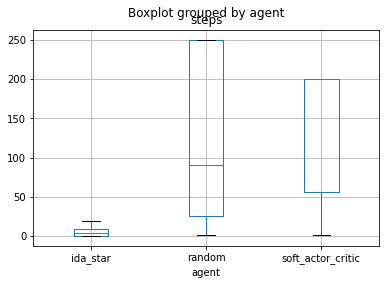

In [7]:
df.boxplot(column=["steps"], by='agent')